# NGC 4848

NGC 4848 (CGCG 160-055; Zwicky et al. 1961−1968) is
a bright (MB = −20.5) SBab:edge-on (RC3, de Vaucouleurs
et al. 1991) galaxy that lies at the northwest (N-W) periphery of
the X-ray emitting region in the Coma cluster. It has a vigorous star-formation rate (SFR) of ∼9 $M_\odot\, \text{yr}^{−1}$ as derived from the Hα, ultraviolet (UV), far-infrared (FIR), and radio-continuum emission.

In spite of its SBab classification, the morphology of NGC 4848
is rather irregular, being composed of a central nuclear source
(harboring an active galactic nucleus (AGN) [NII]λ6584 Å/Hα =
0.64, see Gavazzi et al. 2011) with red (g − i = 1.5 mag) color.
At a 5−10 arcsec projected radial distance from the nucleus, a
bright, blue, and clumpy ring of active HII regions dominates
the galaxy morphology. Further out, the light profile falls-oﬀ ex-
ponentially, as is typical of a disk

<img src="images/NGC4848.png" width="500"/>

In [35]:
from astropy.io import fits
import numpy as np

# Open the FITS file and load data
with fits.open("DATA/NGC_4848/NGC4848_cut.fits") as hdul:
    hdul.info()  # Shows a summary of the FITS file

    print('\n')
    header_0 = hdul[0].header
    for card in header_0.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")  
    
    print('\n')
    header_1 = hdul[1].header
    for card in header_1.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")

    print('\n')
    header_2 = hdul[2].header
    for card in header_2.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")
        
    # Load data
    cube = hdul[1].data 
    var = hdul[2].data 

# Generate the wavelength array
channels = np.arange(0, header_1['NAXIS3'], 1)
w = header_1['CRVAL3'] + channels * header_1['CD3_3']   # wavelength in angstrom

cube_units = 1e-20
var_units = 1e-40

naxis1, naxis2 = header_1['NAXIS1'], header_1['NAXIS2']
crpix1, crpix2 = header_1['CRPIX1'], header_1['CRPIX2']
crval1, crval2 = header_1['CRVAL1'], header_1['CRVAL2']
cdelt1, cdelt2 = header_1['CD1_1'], header_1['CD2_2']

# RA range
ra_min = crval1 + (1 - crpix1) * cdelt1
ra_max = crval1 + (naxis1 - crpix1) * cdelt1

# DEC range
dec_min = crval2 + (1 - crpix2) * cdelt2
dec_max = crval2 + (naxis2 - crpix2) * cdelt2

Filename: DATA/NGC_4848/NGC4848_cut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  DATA          1 ImageHDU        40   (290, 395, 3400)   float32   
  2  STAT          1 ImageHDU        40   (290, 395, 3400)   float32   


SIMPLE   = True / conforms to FITS standard
BITPIX   = 8 / array data type
NAXIS    = 0 / number of array dimensions
EXTEND   = True / 
ORIGIN   = ESO-PARANAL / European Southern Observatory
TELESCOP = ESO-VLT-U4 / ESO <TEL>
INSTRUME = MUSE / Instrument used.
RA       = 194.523288 / [deg] 12:58:05.5 RA (J2000) pointing
DEC      = 28.23893 / [deg] 28:14:20.1 DEC (J2000) pointing
EQUINOX  = 2000.0 / Standard FK5
EXPTIME  = 1000.0 / Integration time
MJD-OBS  = 59648.23948721 / Obs start
DATE-OBS = 2022-03-10T05:44:51.695 / Observing date
PI-COI   = UNKNOWN / PI-COI name.
OBSERVER = UNKNOWN / Name of observer.
OBJECT   = NGC4848 / Original target.
ESO INS DROT POSANG = 345.5 / [deg] Derotator po

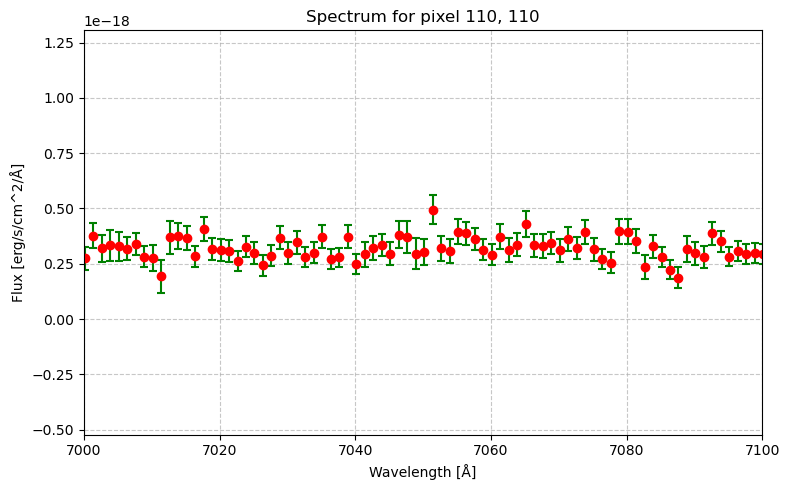

In [37]:
import matplotlib.pyplot as plt

x = 110
y = 110

# Plotting with improved styling
plt.figure(figsize=(8, 5))
plt.errorbar(w, cube[:, x, y]*cube_units, yerr=np.sqrt(var[:, x, y]*var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5)

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [erg/s/cm^2/Å]")
plt.title(f"Spectrum for pixel {x:.0f}, {y:.0f}")
plt.xlim(7000, 7100)  # Optional zoom-in


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [38]:
# spectra adding all spatial pixels

summed_spectra = np.nansum(cube, axis=(1, 2))


In [39]:
summed_var = np.nansum(var, axis=(1,2))

In [9]:
print(summed_spectra)
print(np.sqrt(summed_var))

[1173457.8   979239.56 1058126.5  ...  699305.4   565129.    104944.53]
[5339.072  3877.6147 3683.133  ... 1369.8198 1539.4637 2753.5574]


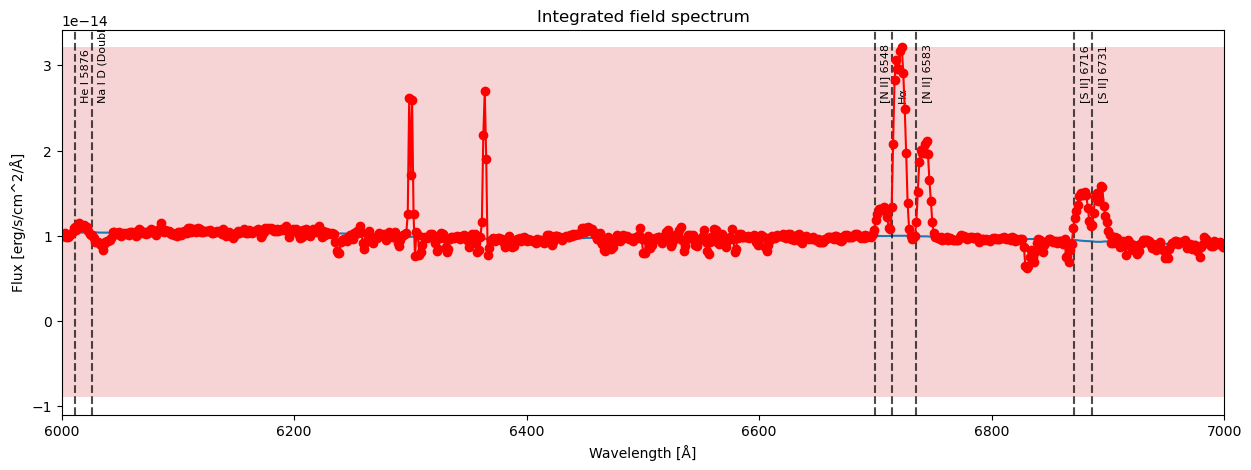

In [40]:
fig,ax = plt.subplots(figsize=(15,5))
plt.title("Integrated field spectrum")

plt.errorbar(w, summed_spectra*cube_units, yerr=np.sqrt(summed_var*var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5,linestyle='-')

from scipy.ndimage import median_filter
continuum = median_filter(summed_spectra, size=101,mode="nearest")  # Choose an odd kernel size
plt.plot(w,continuum*cube_units)

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [erg/s/cm^2/Å]")

# Define UBVRI filter wavelength ranges (in Angstrom)
filters = {
    "U": (3200, 4000),
    "B": (4000, 5000),
    "V": (5000, 6000),
    "R": (6000, 7000),
    "I": (7000, 9000),
}

min = np.min(summed_spectra*cube_units)
max = np.max(summed_spectra*cube_units)
# Add vertical shaded regions corresponding to the filters
for name, (wmin, wmax) in filters.items():
    plt.fill_betweenx([min, max], wmin, wmax, alpha=0.2, label=f"{name} filter")
    
z_Coma = 0.0231

# Define important emission/absorption lines in galaxies
# Define important emission/absorption lines in galaxies
spectral_lines = {
    # Optical Lines
    "O II (Doublet)": 3727,
    "Hγ": 4340,
    "Hδ": 4102,
    "Hβ": 4861,
    "[O III] 4959": 4959,
    "[O III] 5007": 5007,
    "He II 4686": 4686,
    "He I 4471": 4471,
    "He I 5876": 5876,
    "Hα": 6563,
    "[N II] 6548": 6548,
    "[N II] 6583": 6583,
    "[S II] 6716": 6716,
    "[S II] 6731": 6731,
    "[Ar III] 7136": 7136,
    "[Fe II] 5159": 5159,

    # Calcium Lines
    "[Ca II] 8498": 8498,
    "[Ca II] 8542": 8542,
    "[Ca II] 8662": 8662,
    "Ca H": 3968,
    "Ca K": 3934,

    # Magnesium and Sodium Lines
    "Mg I 5175": 5175,
    "Na I D (Doublet)": 5890,  # Doublet at 5890 and 5896 Å
}
# Apply redshift correction to each spectral line
redshifted_lines = {name: wavelength * (1 + z_Coma) for name, wavelength in spectral_lines.items()}

# Add vertical dashed lines for spectral features
for name, wavelength in redshifted_lines.items():
    plt.axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)
    plt.text(wavelength + 5, max * 0.8, name, 
             rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)

#plt.xlim(4750.15,7500)
#plt.xlim(6850,6900)
plt.xlim(6000,7000)



plt.show()


In [42]:
crval3 = header_1['CRVAL3']
dw = header_1['CD3_3'] 
Ha_channel_inf = int((6700 - crval3)/dw)
Ha_channel_sup = int((6750 - crval3)/dw)
continuum_channel_inf = int((6645 - crval3)/dw)
continuum_channel_sup = int((6695 - crval3)/dw)

units = 1e-20 * 50 / ( cdelt1 * 3600 )**2   # integrating on wavelength, per arcsec^2

integrated_Ha_continuum = np.nansum(cube[Ha_channel_inf:Ha_channel_sup, :, :],axis=0) * units
integrated_continuum_near_Ha = np.nansum(cube[continuum_channel_inf:continuum_channel_sup, :, :], axis=0) * units

integrated_Ha = integrated_Ha_continuum - integrated_continuum_near_Ha


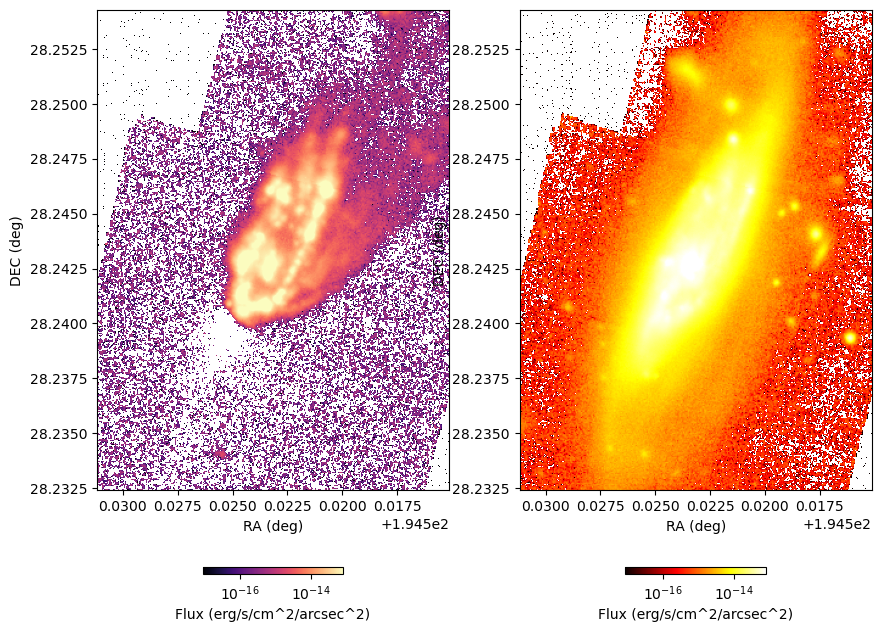

In [43]:
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the size for better appearance
ax = ax.flatten()

# Define color normalization for logarithmic scaling
norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))

# Plotting the integrated Ha
cmap = plt.cm.magma
cmap.set_bad(color='white')
im0 = ax[0].imshow(integrated_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[0].set_xlabel("RA (deg)")  # Label for X-axis
ax[0].set_ylabel("DEC (deg)")  # Label for Y-axis

# Plotting the integrated continuum near Ha
im1 = ax[1].imshow(integrated_continuum_near_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='hot', norm=norm)
ax[1].set_xlabel("RA (deg)")  # Label for X-axis
ax[1].set_ylabel("DEC (deg)")  # Label for Y-axis

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.4, pad = 0.1)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.4, pad = 0.1)

cbar0.set_label("Flux (erg/s/cm^2/arcsec^2)")  
cbar1.set_label("Flux (erg/s/cm^2/arcsec^2)")  

In [45]:
# Create regions
import matplotlib.path as mpath

# Add ellipses
center = (194.523241, 28.242570)  # Center of the galaxy (reference coordinates)
angle = - 64  # Angle of tilt in degrees

x = np.linspace(ra_min,ra_max)
m_semimajor_axis = np.tan(np.radians(angle))
y_semi =  m_semimajor_axis * (x - center[0]) + center[1]

e = np.sqrt(1-(160/450)**2)
width = 30 * cdelt1
n = 7

# Generate the coordinate grid
y_coords, x_coords = np.meshgrid(np.linspace(dec_min, dec_max, integrated_Ha.shape[0]),
                                 np.linspace(ra_min, ra_max, integrated_Ha.shape[1]),
                                 indexing='ij')
x_p = 194.52 + 0.0046
y_p = m_semimajor_axis * (x_p - center[0]) + center[1]
m_line = -1/m_semimajor_axis
y_line =  m_line * (x - x_p) + y_p

down_mask = (y_coords < m_line * (x_coords - x_p) + y_p)

# Flatten coordinates for easier processing
points = np.vstack((x_coords.ravel(), y_coords.ravel())).T

masks = []

for i in range(1, n):

    mask = np.zeros_like(integrated_Ha, dtype=bool)
    
    # external ellipse
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_ext = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # internal ellipse
    a = width * (i-1)                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_int = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # Create paths for the ellipses
    path_ext = mpath.Path(vertices_ext)
    path_int = mpath.Path(vertices_int)

    # Mask points within the external but outside the internal ellipse
    mask_ext = path_ext.contains_points(points).reshape(mask.shape)
    mask_int = path_int.contains_points(points).reshape(mask.shape)
    
    mask |= (mask_ext & ~mask_int & down_mask)
    
    masks.append(mask)
    

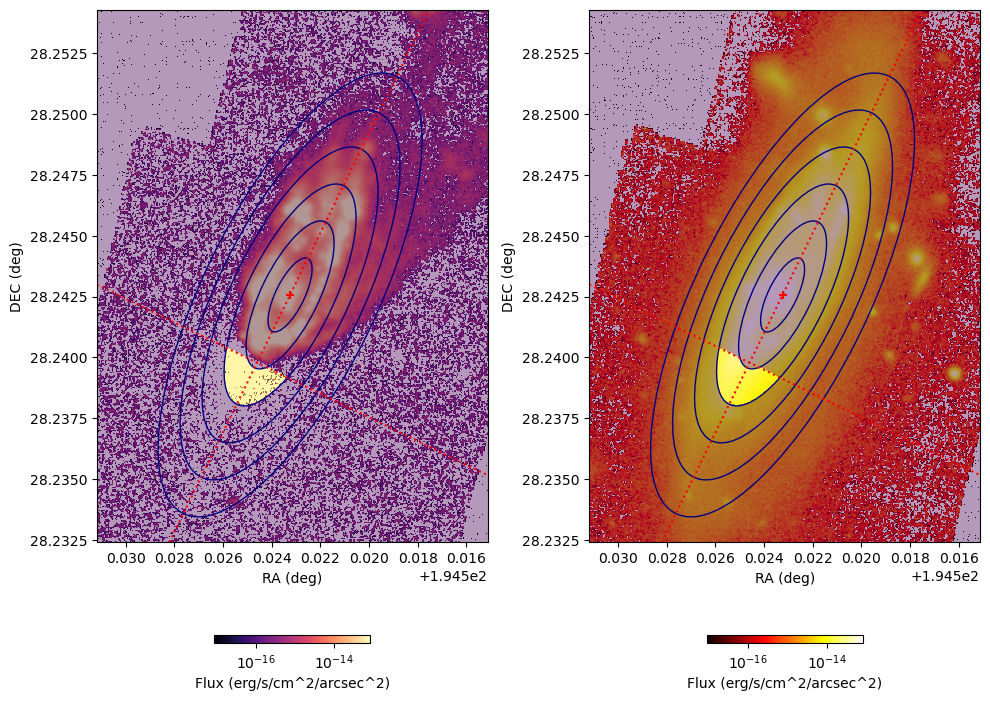

In [46]:
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the size for better appearance
ax = ax.flatten()

# Define color normalization for logarithmic scaling
norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))

# Plotting the integrated Ha
cmap = plt.cm.magma
cmap.set_bad(color='white')
im0 = ax[0].imshow(integrated_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[0].set_xlabel("RA (deg)")  # Label for X-axis
ax[0].set_ylabel("DEC (deg)")  # Label for Y-axis

# Plotting the integrated continuum near Ha
im1 = ax[1].imshow(integrated_continuum_near_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='hot', norm=norm)
ax[1].set_xlabel("RA (deg)")  # Label for X-axis
ax[1].set_ylabel("DEC (deg)")  # Label for Y-axis

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.4, pad = 0.1)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.4, pad = 0.1)

cbar0.set_label("Flux (erg/s/cm^2/arcsec^2)")  
cbar1.set_label("Flux (erg/s/cm^2/arcsec^2)")  

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        #x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        #y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        #ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')

ax[0].scatter(center[0], center[1], marker='+', c='red')
ax[1].scatter(center[0], center[1], marker='+', c='red')
ax[0].plot(x,y_semi,linestyle=':',c='red')
ax[1].plot(x,y_semi,linestyle=':',c='red')
ax[0].plot(x,y_line,linestyle=':',c='red')
ax[1].plot(x,y_line,linestyle=':',c='red')

ax[0].imshow(masks[2], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.4) #cmap=cmaps[i-1]
ax[1].imshow(masks[2], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.4) #cmap=cmaps[i-1]

for k in range(2):
    ax[k].set_xlim(ra_min,ra_max)
    ax[k].set_ylim(dec_min,dec_max)
    #ax[k].set_xlim(194.5+0.03,194.5+0.022)
    #ax[k].set_ylim(28.235,28.243)
    #ax[k].grid()


# Adjusting layout to make it fit better
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the tight_layout to leave space for colorbars
plt.show()


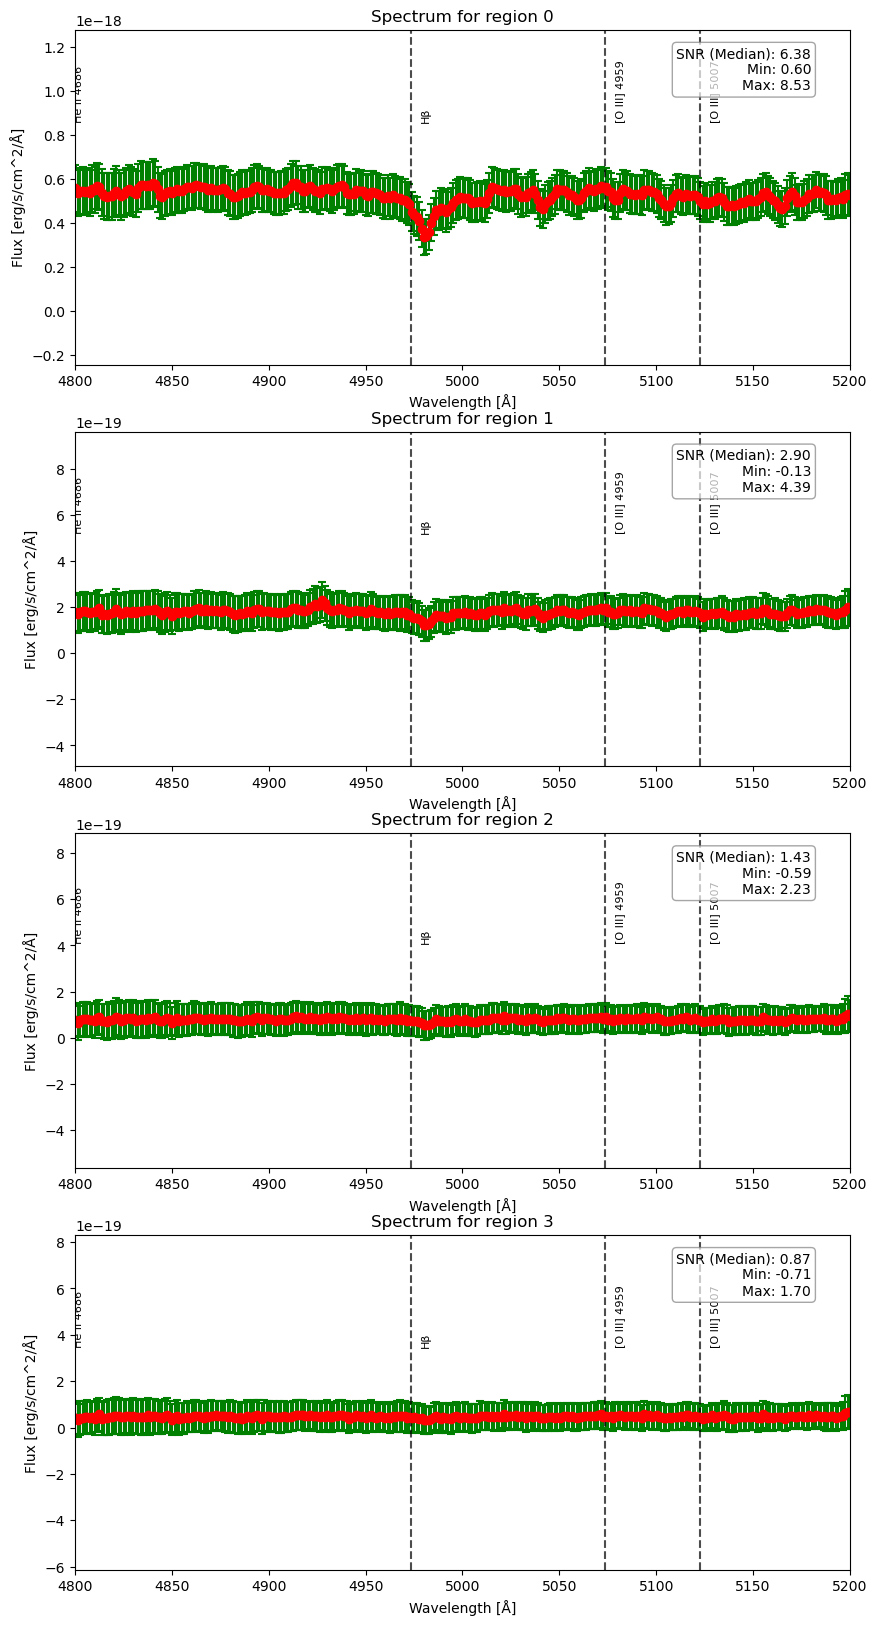

In [27]:
fig,ax= plt.subplots(4,1,figsize=(10,20))
ax = ax.flatten()

for i,mask in enumerate(masks[2:]):
    n = len(mask[mask==True])
    # Sum the spectra for the region defined by the mask (sum over the spatial axes)
    spectra_region = np.nansum(cube[:, mask], axis=1) / n
    var_region = np.nansum(var[:, mask], axis=1) / n
    ax[i].errorbar(w, spectra_region * cube_units, yerr=np.sqrt(var_region * var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5)

    snr = spectra_region / np.sqrt(var_region)
    #ax[i].plot(w,snr)
    snr_median = np.nanmedian(snr)
    snr_min = np.nanmin(snr)
    snr_max = np.nanmax(snr)
    
    # Add text to the upper right of the plot
    ax[i].text(
        0.95, 0.95, 
        f"SNR (Median): {snr_median:.2f}\nMin: {snr_min:.2f}\nMax: {snr_max:.2f}",
        ha='right', va='top', 
        transform=ax[i].transAxes, 
        fontsize=10, bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white', alpha=0.7)
    )

    # Add vertical dashed lines for spectral features
    max = np.max(spectra_region*cube_units)
    for name, wavelength in redshifted_lines.items():
        ax[i].axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)
        ax[i].text(wavelength + 5, max * 1.3, name, 
                 rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)
    
    #ax[i].set_xlim(6600,7800)
    ax[i].set_xlim(4800,5200)
    ax[i].set_xlabel("Wavelength [Å]")
    ax[i].set_ylabel("Flux [erg/s/cm^2/Å]")
    ax[i].set_title(f"Spectrum for region {i:.0f}")



In [9]:
# Import models 

with fits.open("../environment/Models_N4330_region1.fits") as modhdu:
    #hdul.info()
    #print(modhdu[0].header)

    Next = modhdu[0].header['NEXT'] 
    modwave = modhdu[0].data[0]
    
    models = []
    for ext in np.arange(1,Next+1):
        
        thishead = modhdu[ext].header
        modspec = modhdu[ext].data[0]
        
        Qtau = thishead['TRUNCTAU']
        Qage = thishead['TRUNCAGE']

        photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
        thishead['MODU'],thishead['MODG'],\
        thishead['MODI'],thishead['MODZ'], \
        thishead['MODIR1'],thishead['MODIR4']))

        models.append({"spec":modspec,"Qtau":Qtau,"Qage":Qage,"photarr":photarr})


0.004449320412019233


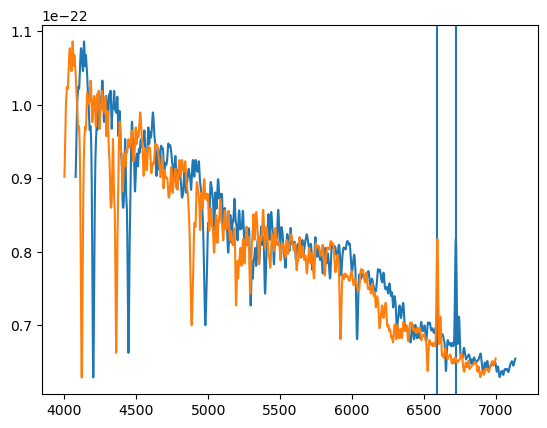

In [3]:
import matplotlib.pyplot as plt
#for i in np.arange(0,Next,20):
    #plt.plot(modwave,models[i]["spec"])
    #plt.plot(modwave,models[i]["spec"])

w_Ha = 6562.8
w_Ha_4848 = 6720
z_4848 = (w_Ha_4848 - w_Ha) / w_Ha

w_Ha_model = 6592 
z_model = (w_Ha_model - w_Ha) / w_Ha   # (0.005214, NGC 4330)
print(z_model)

plt.axvline(w_Ha_model)
plt.axvline(w_Ha_4848)

modwave_new = modwave - (z_model - z_4848) * modwave
plt.plot(modwave_new,models[0]["spec"])
plt.plot(modwave,models[0]["spec"])

#plt.xlim(6500,7000)

In [20]:

# Assuming `cube` has shape (n_wavelengths, y_size, x_size)

# Ensure the spatial dimensions are divisible by 4
y_size, x_size = cube.shape[1], cube.shape[2]
new_y_size, new_x_size = y_size // 4, x_size // 4

# Reshape the cube by summing the spectra in each 4x4 block
reshaped_cube = np.zeros((cube.shape[0], new_y_size, new_x_size))

for x in tqdm(range(new_x_size)):
    for y in range(new_y_size):
        # Sum the spectra in the 4x4 block at position (y, x)
        spectra_block = cube[:, y*4:(y+1)*4, x*4:(x+1)*4]  # Extract the 4x4 block
        reshaped_cube[:, y, x] = np.sum(spectra_block, axis=(1, 2))  # Sum across y and x

# `reshaped_cube` now has the shape (n_wavelengths, new_y_size, new_x_size)


100%|███████████████████████████████████████████| 72/72 [05:57<00:00,  4.97s/it]


In [23]:
print(reshaped_cube.shape)
print(Q_tau.shape)

(3400, 98, 72)
(98, 72)


In [26]:
spatial_shape = reshaped_cube.shape[1:]  # (y_size, x_size)
Q_tau = np.zeros(spatial_shape)
Q_age = np.zeros(spatial_shape)

# Pre-interpolate model spectra to match the wavelength grid
model_specs_interp = []
for model in models:
    interp_model = interp1d(modwave_new, model['spec'], kind='linear', bounds_error=False, fill_value=0)
    model_specs_interp.append(interp_model(w))
model_specs_interp_norm = np.array(model_specs_interp) / np.mean(model_specs_interp)  # Shape: (n_models, n_channels)

# Process the new 4x4 blocks of pixels
for x in tqdm(range(Q_tau.shape[1])):  # Loop over X-axis (columns)
    for y in range(Q_tau.shape[0]):  # Loop over Y-axis (rows)
        
        # Extract spectrum for the 4x4 pixel region
        spectrum = reshaped_cube[:, y, x]  # (n_channels,)
        error = reshaped_cube[:, y, x] / 10  # (n_channels,) -- assuming error scaling factor

        # Normalize the summed spectrum and error
        spectrum_norm = spectrum / np.mean(spectrum)  # (n_channels,)
        error_norm = error / np.mean(spectrum)  # (n_channels,)

        # Compute chi-square for all models using broadcasting
        # Expand spectrum_norm to shape (n_models, n_channels) for broadcasting
        spectrum_norm_expanded = np.tile(spectrum_norm, (model_specs_interp_norm.shape[0], 1))  # (n_models, n_channels)

        chi2_spec = np.nansum(((model_specs_interp_norm - spectrum_norm_expanded) ** 2) / (error_norm**2), axis=1)  # (n_models,)

        # Get the best-fit model index
        i = np.argmin(chi2_spec)

        # Fill Q_tau and Q_age with the best model parameters for the 4x4 region
        Q_tau[y, x] = models[i]['Qtau']
        Q_age[y, x] = models[i]['Qage']

100%|███████████████████████████████████████████| 72/72 [00:22<00:00,  3.18it/s]


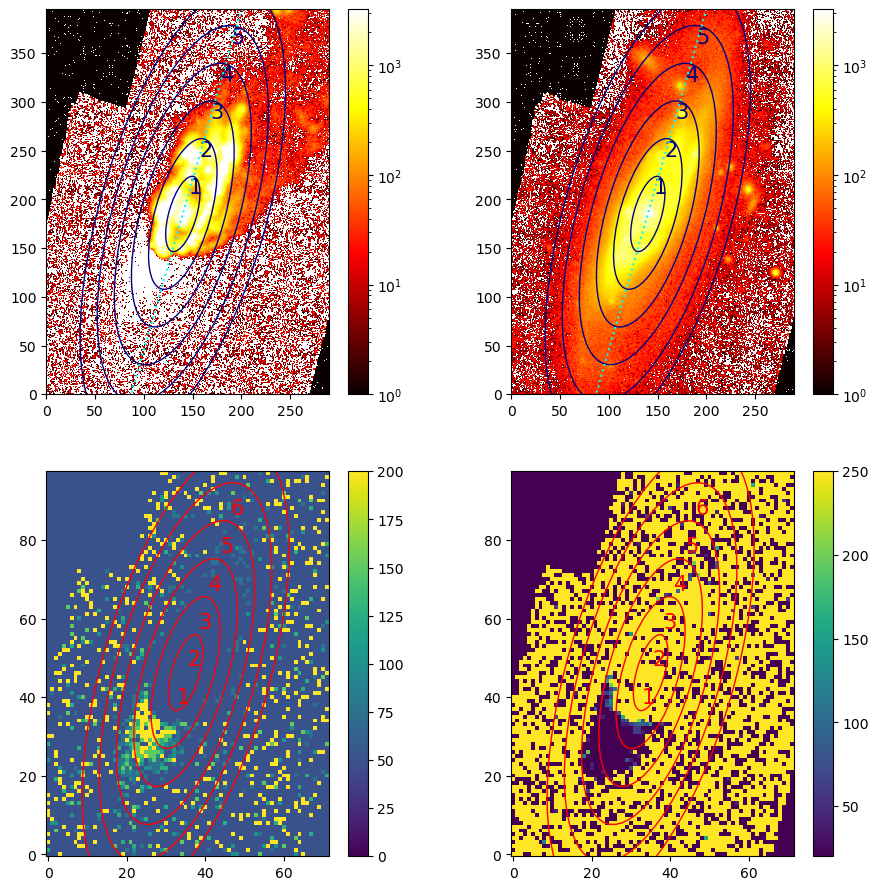

In [38]:
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(2, 2, figsize=(11, 11))
ax = ax.flatten()

# Define color normalization for logarithmic scaling
norm = LogNorm(vmin=1e-0, vmax=np.nanquantile(integrated_Ha, 0.99))

cmap = plt.cm.hot
cmap.set_bad(color='green')
im0 = ax[0].imshow(integrated_Ha, origin='lower', cmap='hot', norm=norm)
im1 = ax[1].imshow(integrated_continuum_near_Ha, origin='lower', cmap='hot',norm=norm)

fig.colorbar(im0, ax=ax[0], orientation='vertical')
fig.colorbar(im1, ax=ax[1], orientation='vertical')


im2 = ax[2].imshow(Q_age, origin='lower', cmap='viridis',vmin=0,vmax=200) #clim=[0,np.nanquantile(integrated_Ha,0.99)]
im3 = ax[3].imshow(Q_tau, origin='lower', cmap='viridis')


fig.colorbar(im2, ax=ax[2], orientation='vertical')
fig.colorbar(im3, ax=ax[3], orientation='vertical')

# Add ellipses
center = (140, 185)  # Center of the ellipse (x, y)
angle = 64  # Angle of tilt in degrees

x = np.linspace(0,290)
m_semimajor_axis = np.tan(np.radians(angle))
y =  m_semimajor_axis * (x - center[0]) + center[1]
ax[0].plot(x,y,linestyle=':',c='cyan')
ax[1].plot(x,y,linestyle=':',c='cyan')

e = np.sqrt(1-(160/450)**2)
width = 40
n = 7
t = 16

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)
        x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='navy')

# Create ellipses and add them to the plot
for i in range(1, n):
    center = (140/4, 185/4)
    a = width * i / 4                # semimajor axis
    b = a * np.sqrt(1-e**2)   
    for k in range(2,4):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='red', facecolor='none')
        ax[k].add_patch(ellipse)
        x_text = center[0] + a * np.cos(np.radians(angle)) - 5
        y_text = m_semimajor_axis * (x_text - center[0]) + center[1]
        ax[k].text(x_text,y_text, i, fontsize=15, zorder=1, clip_on=True,c='red')

for k in range(2):
    ax[k].set_xlim(0,integrated_Ha.shape[1])
    ax[k].set_ylim(0,integrated_Ha.shape[0])


plt.show()